<a href="https://colab.research.google.com/github/zhubzy/SF-Incident-Prediction/blob/main/SF_Incident_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# San Francisco Incident Prediction

## Research Question / Topic:
 **How can we predict the category of a crime incident (e.g., theft, assault, vandalism) based on the time of day (morning, afternoon, evening, night) and specific location (latitude and longitude coordinates) in San Francisco?**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Police_Department_Incident_Reports__2018_to_Present.csv')

In [3]:
df.columns

Index(['Incident Datetime', 'Incident Date', 'Incident Time', 'Incident Year',
       'Incident Day of Week', 'Report Datetime', 'Row ID', 'Incident ID',
       'Incident Number', 'CAD Number', 'Report Type Code',
       'Report Type Description', 'Filed Online', 'Incident Code',
       'Incident Category', 'Incident Subcategory', 'Incident Description',
       'Resolution', 'Intersection', 'CNN', 'Police District',
       'Analysis Neighborhood', 'Supervisor District',
       'Supervisor District 2012', 'Latitude', 'Longitude', 'Point',
       'Neighborhoods', 'ESNCAG - Boundary File',
       'Central Market/Tenderloin Boundary Polygon - Updated',
       'Civic Center Harm Reduction Project Boundary',
       'HSOC Zones as of 2018-06-05', 'Invest In Neighborhoods (IIN) Areas',
       'Current Supervisor Districts', 'Current Police Districts'],
      dtype='object')

In [4]:
df.size

27875960

# **Data Cleaning and Pre-Processing**

First, we want to remove all rows where some data are missing for the columns we care about

In [5]:
df_cleaned = df.dropna(subset=['Incident Datetime', 'Incident Category', 'Intersection', 'Latitude', 'Longitude'])

In [6]:
df_cleaned.size

26337080

## Incident Datetime Data Exploration

In [7]:
df['Incident Datetime'].values

array(['2023/03/13 11:41:00 PM', '2023/03/01 05:02:00 AM',
       '2023/03/13 01:16:00 PM', ..., '2023/03/21 09:19:00 PM',
       '2023/03/22 03:28:00 PM', '2023/03/21 05:42:00 PM'], dtype=object)

In [8]:
df.head()

,Incident Datetime,Incident Date,Incident Time,Incident Year,Incident Day of Week,Report Datetime,Row ID,Incident ID,Incident Number,CAD Number,...,Longitude,Point,Neighborhoods,ESNCAG - Boundary File,Central Market/Tenderloin Boundary Polygon - Updated,Civic Center Harm Reduction Project Boundary,HSOC Zones as of 2018-06-05,Invest In Neighborhoods (IIN) Areas,Current Supervisor Districts,Current Police Districts
0,2023/03/13 11:41:00 PM,2023/03/13,23:41,2023,Monday,2023/03/13 11:41:00 PM,125373607041,1253736,230167874,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2023/03/01 05:02:00 AM,2023/03/01,05:02,2023,Wednesday,2023/03/11 03:40:00 PM,125379506374,1253795,236046151,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2023/03/13 01:16:00 PM,2023/03/13,13:16,2023,Monday,2023/03/13 01:17:00 PM,125357107041,1253571,220343896,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2023/03/13 10:59:00 AM,2023/03/13,10:59,2023,Monday,2023/03/13 11:00:00 AM,125355107041,1253551,230174885,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2023/03/14 06:44:00 PM,2023/03/14,18:44,2023,Tuesday,2023/03/14 06:45:00 PM,125402407041,1254024,230176728,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


C:\Users\embar\AppData\Local\Temp\ipykernel_12580\3598357430.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Incident Datetime'] = pd.to_datetime(df['Incident Datetime'])


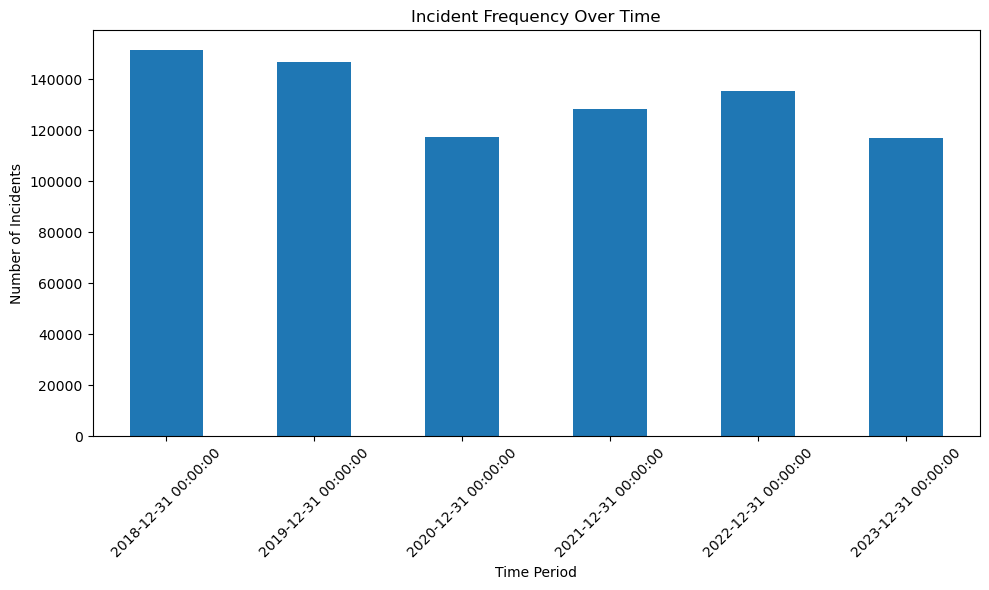

In [9]:
df['Incident Datetime'] = pd.to_datetime(df['Incident Datetime'])

df.set_index('Incident Datetime', inplace=True)


incident_frequency = df.resample('Y').size() 

plt.figure(figsize=(10, 6)) 
incident_frequency.plot(kind='bar') 
plt.title('Incident Frequency Over Time')
plt.xlabel('Time Period')
plt.ylabel('Number of Incidents')
plt.xticks(rotation=45) 
plt.tight_layout()  
plt.show()

From this graph, we can tell that the number of incidents of recent years has seen a significant decrease. Even though the decrease in 2020 can be explained with covid, the low number of incidents in 2023 is still a positive sign.

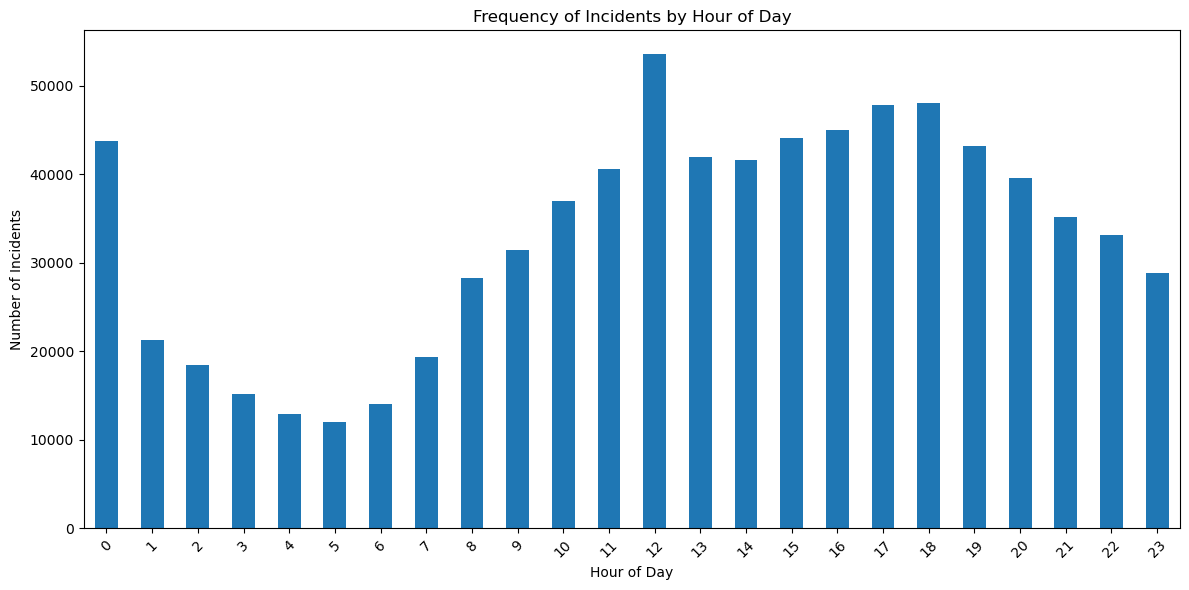

In [10]:
df['Hour of the day'] = df.index.hour
hourly_frequency = df.groupby('Hour of the day').size()

plt.figure(figsize=(12, 6))
hourly_frequency.plot(kind='bar')
plt.title('Frequency of Incidents by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Incidents')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

From this graph, we see that the incident rate sees its peak at noon and afternoon. Besides, 1am to 7 pm are generally the safest hours.

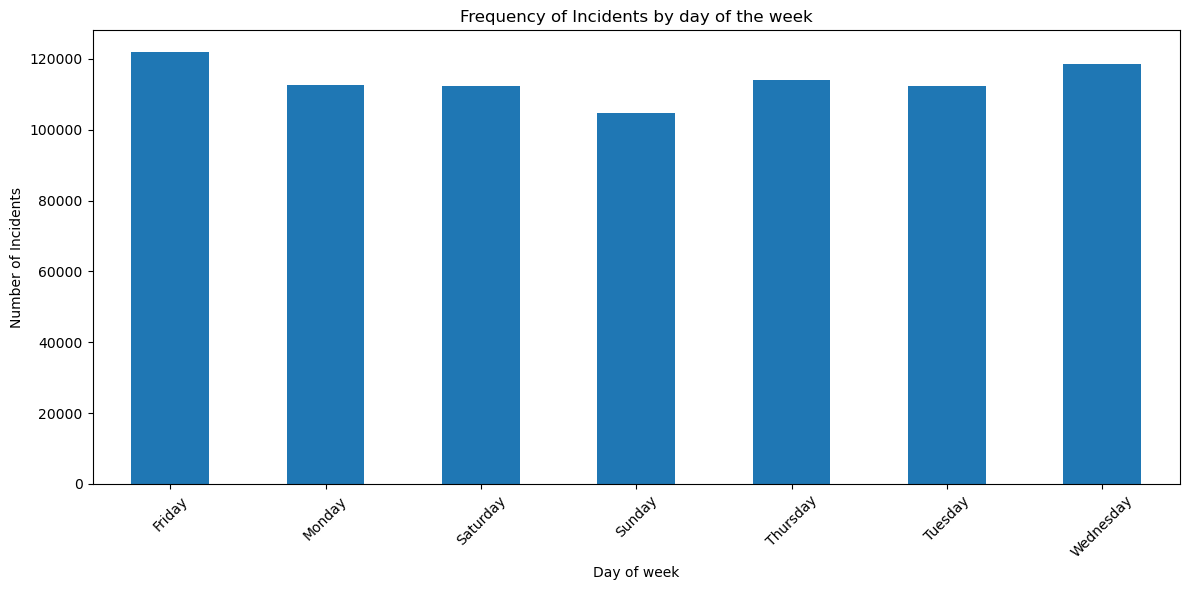

In [11]:
day_of_week_counts = df['Incident Day of Week'].value_counts().sort_index()
day_of_week_counts

plt.figure(figsize=(12, 6))
day_of_week_counts.plot(kind='bar')
plt.title('Frequency of Incidents by day of the week')
plt.xlabel('Day of week')
plt.ylabel('Number of Incidents')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Here, we see the friday has the most incidents and sunday has the least. However, all days are more or less close to each other.

## Incident Location Data Exploration

## Incident Category Data Exploration